In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn import datasets, linear_model, metrics


In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [123]:
df_train=pd.read_csv("/content/gdrive/MyDrive/world_train.csv")
df_test=pd.read_csv("/content/gdrive/MyDrive/worldtest.csv")




In [124]:
df_train.head()
df_train.shape


(6, 10)

In [125]:
df_test.head()

,Gross domestic product,Investment,Inflation,Trade volume of goods and services,Crude Oil (petroleum),Natural Gas,Wheat,Soybeans,Commodity Wool Index includes Coarse and Fine Wool Price Indices
0,3.230,2.4252,3.1167,9.544,2.2985,2.598,1.28658,2.09803,5.3126
1,3.359,2.4146,1.6072,6.577,1.9368,2.312,1.51161,2.30138,5.9268
2,3.926,2.4090,0.9337,10.229,1.9036,2.696,1.40212,2.29510,5.0354
3,4.013,2.3784,0.6526,4.884,1.6787,2.750,1.49783,2.24015,5.5902
4,2.577,2.3799,0.6313,5.102,1.5948,2.670,1.76960,2.77458,4.1371


In [126]:
df_train.isnull().sum()
df_test.isnull().sum()

Gross domestic product                                              0
Investment                                                          0
Inflation                                                           0
Trade volume of goods and services                                  0
Crude Oil (petroleum)                                               0
Natural Gas                                                         0
Wheat                                                               0
Soybeans                                                            0
Commodity Wool Index includes Coarse and Fine Wool Price Indices    0
dtype: int64

In [127]:
X_1=df_train.drop('Gross domestic product',axis=1)
X=X_1.drop('Subject Descriptor',axis=1).values
y=df_train['Gross domestic product'].values
y

array([3.805, 3.426, 2.685, 2.331, 2.041, 3.23 ])

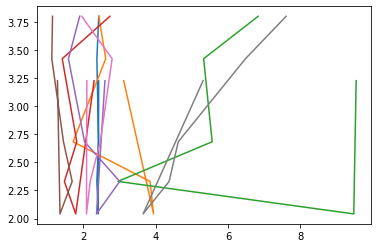

In [129]:
plt.plot(X,y)

In [130]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1 ,random_state=5)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)


(5, 8)
(1, 8)
(5,)


In [132]:
X_test=df_test.drop('Gross domestic product',axis=1).values
y_test=df_test['Gross domestic product'].values
y_test
X_test

array([[ 2.4252 ,  3.1167 ,  9.544  ,  2.2985 ,  2.598  ,  1.28658,
         2.09803,  5.3126 ],
       [ 2.4146 ,  1.6072 ,  6.577  ,  1.9368 ,  2.312  ,  1.51161,
         2.30138,  5.9268 ],
       [ 2.409  ,  0.9337 , 10.229  ,  1.9036 ,  2.696  ,  1.40212,
         2.2951 ,  5.0354 ],
       [ 2.3784 ,  0.6526 ,  4.884  ,  1.6787 ,  2.75   ,  1.49783,
         2.24015,  5.5902 ],
       [ 2.3799 ,  0.6313 ,  5.102  ,  1.5948 ,  2.67   ,  1.7696 ,
         2.77458,  4.1371 ]])

In [134]:
poly_reg=PolynomialFeatures(degree=2)
poly_reg.fit(X_train)
X_train_poly=poly_reg.transform(X_train)
X_test_poly=poly_reg.transform(X_test)

In [135]:
X_train_poly.shape

(5, 45)

In [136]:
lr=LinearRegression()
ploy_reg_2=lr.fit(X_train_poly,y_train)

In [137]:
lr.score(X_train_poly,y_train)

1.0

In [138]:
y_pred=lr.predict(X_test_poly)
print(y_pred)

[2.76896058 3.12593976 2.97575862 2.9460929  2.56693453]


In [139]:
lasso=Lasso(alpha=0.1)

In [140]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [141]:
lasso.score(X_train,y_train)

0.9702732965005925

In [142]:
lasso.score(X_test,y_test)
y_pre=lasso.predict(X_test)
y_pre

array([2.84306021, 3.08934652, 2.73190656, 2.95437424, 2.3716998 ])

In [143]:
y_test

array([3.23 , 3.359, 3.926, 4.013, 2.577])

In [145]:
APE=100*(abs(y_test-y_pre)/y_test)
print('The Accuracy of ANN model is:', 100-np.mean(APE))

The Accuracy of ANN model is: 83.04621815939328
